# Market Mix Modeling

### Read Data 

Import Libariries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [6]:
df = pd.read_csv(r"C:\Users\Owner\Desktop\Market Mix Modeling\Haven_Home_Living_MMM.csv")
df.head()

,date,category,channel,ad_platform,campaign_name,ad_name,target_customer,audience_targeting,price,promotion_discount,...,holiday_flag,holiday_name,revenue,sales_volume,market_share,spend,impressions,clicks,add_to_carts,orders
0,2024-01-01,Cookware & Bakeware,SEO,Google,Refresh Cookwa 2024,Google - Cookwa Ad,Home Enthusiast,Broad,82.68,0.03,...,0,NaN,7057.56,88,0.16,1812.43,38326,428,61,30
1,2024-01-01,Cookware & Bakeware,Social,TikTok,Summer Cookwa 2024,TikTok - Cookwa Ad,DIY Decorator,Retargeting,121.91,0.15,...,0,NaN,10465.97,101,0.05,2436.88,737052,19830,3085,1366
2,2024-01-01,Cookware & Bakeware,Email,Klaviyo,Spring Cookwa 2024,Klaviyo - Cookwa Ad,Professional Designer,Keywords,189.10,0.09,...,0,NaN,11701.51,68,0.06,1432.33,135889,6648,1168,596
3,2024-01-01,Kitchen Appliances,eFlyers,RetailMeNot,Summer Kitche 2024,RetailMeNot - Kitche Ad,DIY Decorator,Keywords,37.22,0.06,...,0,NaN,2868.92,82,0.07,775.09,110907,2795,532,301
4,2024-01-01,Kitchen Appliances,SEM,Bing,Refresh Kitche 2024,Bing - Kitche Ad,Home Enthusiast,Interests,355.38,0.17,...,0,NaN,23892.20,81,0.18,1649.01,261702,4327,761,455


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2181 non-null   object 
 1   category            2181 non-null   object 
 2   channel             2181 non-null   object 
 3   ad_platform         2181 non-null   object 
 4   campaign_name       2181 non-null   object 
 5   ad_name             2181 non-null   object 
 6   target_customer     2181 non-null   object 
 7   audience_targeting  2181 non-null   object 
 8   price               2181 non-null   float64
 9   promotion_discount  2181 non-null   float64
 10  distribution_index  2181 non-null   float64
 11  holiday_flag        2181 non-null   int64  
 12  holiday_name        58 non-null     object 
 13  revenue             2181 non-null   float64
 14  sales_volume        2181 non-null   int64  
 15  market_share        2181 non-null   float64
 16  spend 

In [8]:
df.isnull().sum()

date                     0
category                 0
channel                  0
ad_platform              0
campaign_name            0
ad_name                  0
target_customer          0
audience_targeting       0
price                    0
promotion_discount       0
distribution_index       0
holiday_flag             0
holiday_name          2123
revenue                  0
sales_volume             0
market_share             0
spend                    0
impressions              0
clicks                   0
add_to_carts             0
orders                   0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,2181.0,253.157478,137.843186,15.02,134.61,248.64,370.02,499.73
promotion_discount,2181.0,0.125910,0.070750,0.00,0.07,0.12,0.19,0.25
distribution_index,2181.0,0.849817,0.086935,0.70,0.77,0.85,0.93,1.00
holiday_flag,2181.0,0.026593,0.160928,0.00,0.00,0.00,0.00,1.00
revenue,2181.0,18774.432031,10910.704889,899.84,9667.68,18153.36,26793.39,58905.00
sales_volume,2181.0,84.779917,12.634930,51.00,76.00,85.00,93.00,126.00
market_share,2181.0,0.147721,0.057915,0.05,0.10,0.15,0.20,0.25
spend,2181.0,1550.639143,844.480335,101.66,802.96,1568.25,2285.13,2997.06
impressions,2181.0,501561.541495,285704.076558,5884.00,256818.00,502889.00,744730.00,999880.00
clicks,2181.0,15159.404402,10988.886493,82.00,6217.00,12833.00,22263.00,49266.00


### Exploratory Data Analysis

In [11]:
# Check correlation between spend and revenue by channel
channel_corr = df.groupby("channel")[["spend", "revenue"]].corr().iloc[0::2,-1]
print(channel_corr)

channel                     
Direct                 spend    0.007224
Display                spend    0.001197
Email                  spend   -0.093642
Partnership/Affiliate  spend    0.018290
Radio                  spend    0.120332
Referring Domain       spend   -0.028784
SEM                    spend    0.000796
SEO                    spend    0.009931
Social                 spend   -0.072218
TV                     spend   -0.044206
eFlyers                spend   -0.040450
Name: revenue, dtype: float64


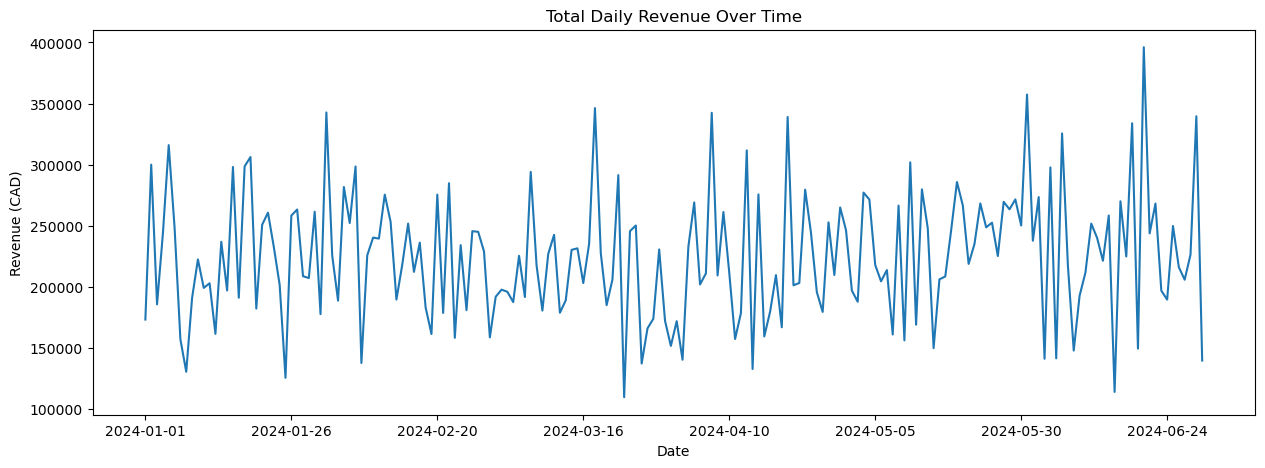

In [12]:
# Visualize revenue over time
plt.figure(figsize=(15,5))
df.groupby("date")["revenue"].sum().plot()
plt.title("Total Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (CAD)")
plt.show()

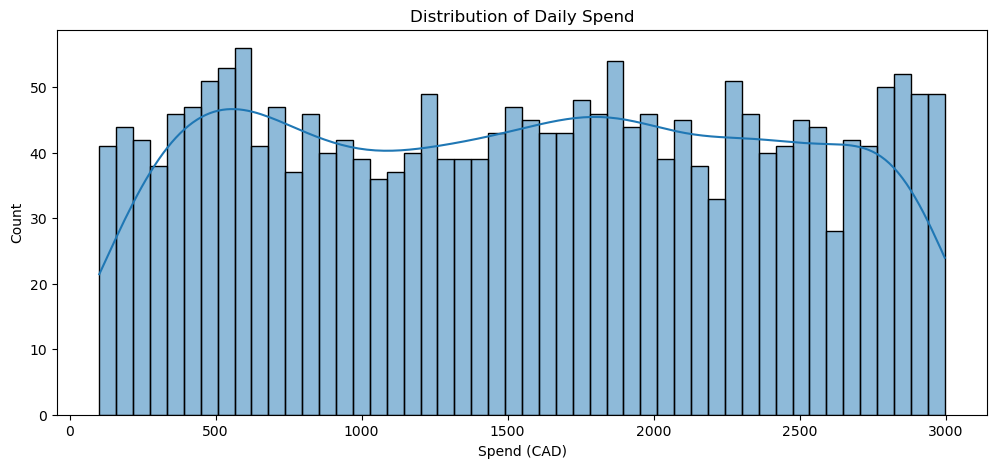

In [13]:
# Visualize distribution of spend 
plt.figure(figsize=(12,5))
sns.histplot(df["spend"], bins=50, kde=True)
plt.title("Distribution of Daily Spend")
plt.xlabel("Spend (CAD)")
plt.show()

### Feature Engineering

We will perform the following feature engineering steps 

##### 2.1 Adstock Transformation

Adstock models the carryover effect of advertising.

Example: A TV ad today may influence sales for several days after.

Formula:

𝑆
𝑝
𝑒
𝑛
𝑑
𝑡
+
𝜆
⋅
𝐴
𝑑
𝑠
𝑡
𝑜
𝑐
𝑘
𝑡
−
1
Where:
λ = decay factor (0–1), higher means longer-lasting effect.
	​


In [17]:
#  --- Adstock Transformation ---
def adstock_transform(x, decay=0.5):
    """
    Apply adstock transformation to capture carryover effects.
    decay: between 0 and 1. Higher decay = longer carryover.
    """
    result = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        if i == 0:
            result[i] = x[i]
        else:
            result[i] = x[i] + decay * result[i-1]
    return result

# Apply adstock per channel
channels = df['channel'].unique()

for ch in channels:
    col_name = f"{ch}_adstock"
    df[col_name] = 0.0  # create full-length column
    mask = df['channel'] == ch
    df.loc[mask, col_name] = adstock_transform(df.loc[mask, 'spend'].values, decay=0.5)



##### 2.2 Diminishing Returns / Saturation

Marketing channels don’t scale linearly forever. At high spend levels, incremental ROI drops.

Typical transformation:


Transformed_Spend=Spend
γ
or
Transformed_Spend=log(Spend+1)

Where 
𝛾
<
1
 to compress large spend values.

In [19]:
#  --- Saturation Transformation (Diminishing Returns) ---
# After adstock, we apply saturation (concave transformation)
gamma = 0.5  # controls curve steepness, 0.3–0.7 typical
for ch in channels:
    ad_col = f"{ch}_adstock"
    sat_col = f"{ch}_adstock_saturation"
    df[sat_col] = np.power(df[ad_col], gamma)




##### 2.3 One-Hot Encoding of Categorical Features

Encode channel, ad_platform, category for regression or boosting models.


In [21]:
from sklearn.preprocessing import OneHotEncoder

# --- Encode Time Features (optional but useful) ---
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0
df['month'] = df['date'].dt.month

#  --- One-Hot Encoding for Categorical Columns ---
categorical_cols = ['category', 'channel', 'ad_platform', 'target_customer', 'audience_targeting']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

#  --- Combine Encoded + Original Data ---
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

#  --- Drop Unused Text Columns (optional for modeling) ---
drop_cols = categorical_cols + ['campaign_name', 'ad_name', 'holiday_name']
df_encoded = df_encoded.drop(columns=drop_cols, errors='ignore')

print("Feature Engineering Complete!")
print("Final shape:", df_encoded.shape)
df_encoded.head()

Feature Engineering Complete!
Final shape: (2181, 75)


,date,price,promotion_discount,distribution_index,holiday_flag,revenue,sales_volume,market_share,spend,impressions,...,ad_platform_RetailMeNot,ad_platform_Rogers,ad_platform_Salesforce,ad_platform_TikTok,ad_platform_YouTube,target_customer_Home Enthusiast,target_customer_Professional Designer,audience_targeting_Interests,audience_targeting_Keywords,audience_targeting_Retargeting
0,2024-01-01,82.68,0.03,0.92,0,7057.56,88,0.16,1812.43,38326,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2024-01-01,121.91,0.15,0.94,0,10465.97,101,0.05,2436.88,737052,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-01-01,189.10,0.09,0.78,0,11701.51,68,0.06,1432.33,135889,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2024-01-01,37.22,0.06,0.79,0,2868.92,82,0.07,775.09,110907,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2024-01-01,355.38,0.17,0.72,0,23892.20,81,0.18,1649.01,261702,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Prepare Features and Target for Train Test Split

1. Target variable: revenue

2. Features: adstock-saturation columns, price, promotion, distribution, holiday flags, day-of-week, month, and encoded categorical variables

In [39]:
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'revenue'

# Feature columns to include in the model
# We’ll select all numeric columns except the target and date
exclude_cols = ['date', 'revenue', 'sales_volume', 'market_share', 
                'impressions', 'clicks', 'add_to_carts', 'orders', 
                'campaign_name', 'ad_name', 'holiday_name']  # avoid leakage & non-predictive text

feature_cols = [col for col in df_encoded.columns if col not in exclude_cols]

# Define X and y
X = df_encoded[feature_cols]
y = df_encoded[target]

# Create a time-based split (train = Jan–May, test = June)
df_encoded['date'] = pd.to_datetime(df_encoded['date'])
train_mask = df_encoded['date'] < pd.to_datetime("2024-06-01")

X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

print("Train/Test Split Complete!")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")



Train/Test Split Complete!
Train set: (1813, 67), Test set: (368, 67)


## Fit Model & Evaluate Model

In [41]:
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'XGBoost': XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

# Train & evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append({
        'Model': name,
        'R²': round(r2, 3),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2)
    })

results_df = pd.DataFrame(results)
print(results_df)


               Model     R²     RMSE      MAE
0  Linear Regression  0.935  2900.13  2090.23
1   Ridge Regression  0.933  2926.86  2079.70
2            XGBoost  0.947  2610.89  1839.03


## Model Interpretation

C:\Users\Owner\AppData\Local\Temp\ipykernel_19512\3598863739.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


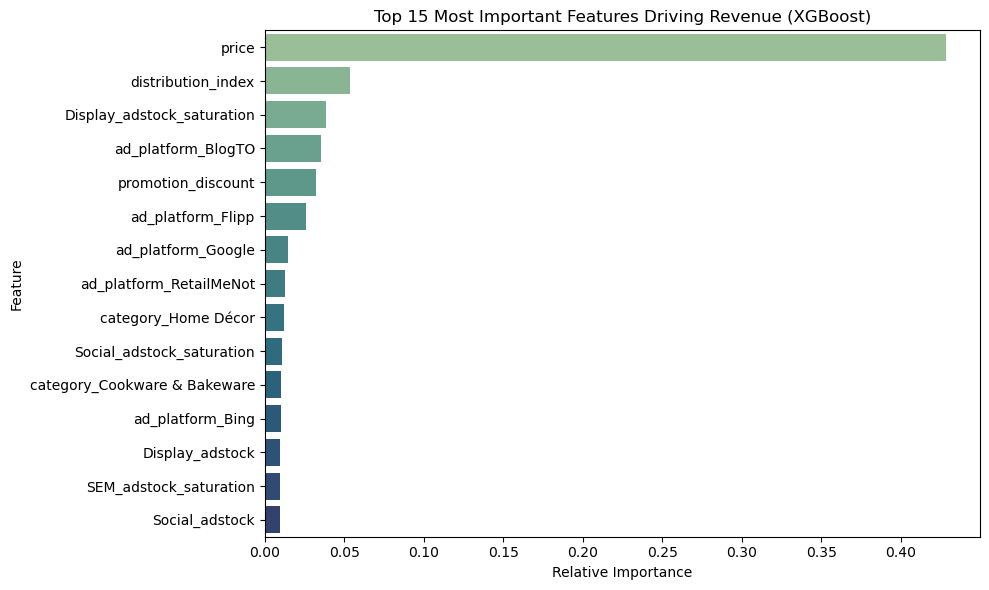

In [45]:

# Get the trained XGBoost model
xgb_model = models['XGBoost']

# Extract feature importances
importance = xgb_model.feature_importances_

# Create a DataFrame for easy plotting
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_imp.head(15),
    palette='crest'
)
plt.title('Top 15 Most Important Features Driving Revenue (XGBoost)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [55]:

feat_imp.sort_values(by='Importance', ascending=False).head(20)

,Feature,Importance
0,price,0.428498
2,distribution_index,0.053577
23,Display_adstock_saturation,0.038590
45,ad_platform_BlogTO,0.035500
1,promotion_discount,0.032542
49,ad_platform_Flipp,0.026294
51,ad_platform_Google,0.014862
57,ad_platform_RetailMeNot,0.012864
30,category_Home Décor,0.012015
17,Social_adstock_saturation,0.010852


In [61]:
# Complete mapping of features to channels (add all channels)
channel_map = {
    'Social': [f'Social_adstock', f'Social_adstock_saturation'],
    'SEM': [f'SEM_adstock', f'SEM_adstock_saturation', 'ad_platform_Google', 'ad_platform_Bing'],
    'SEO': [f'SEO_adstock_saturation'],
    'Display': ['Display_adstock', 'Display_adstock_saturation', 'ad_platform_BlogTO', 'ad_platform_RetailMeNot'],
    'Email': ['ad_platform_Klaviyo', 'ad_platform_Salesforce'],  # example platforms
    'eFlyers': ['ad_platform_Flipp', 'ad_platform_RetailMeNot'],  # example platforms
    'Referring Domain': ['Referring Domain_adstock'],
    'Radio': ['ad_platform_Bell Media', 'ad_platform_Rogers'],  # example platforms
    'Partnership/Affiliate': ['Partnership/Affiliate_adstock_saturation', 'ad_platform_Honey', 'ad_platform_Rakuten'],
    'TV': ['ad_platform_Bell Media', 'ad_platform_CTV'],  # example platforms
    'Direct': ['Direct_adstock']  # if you created Direct adstock
}

# Initialize dictionary for channel-level importances
channel_importance = {}

# Sum feature importances per channel
for channel, features in channel_map.items():
    channel_importance[channel] = feat_imp.loc[feat_imp['Feature'].isin(features), 'Importance'].sum()

# Convert to DataFrame
channel_importance_df = pd.DataFrame({
    'Channel': list(channel_importance.keys()),
    'Importance': list(channel_importance.values())
})

# Normalize to percentages
channel_importance_df['Percentage'] = 100 * channel_importance_df['Importance'] / channel_importance_df['Importance'].sum()

# Sort for plotting
channel_importance_df = channel_importance_df.sort_values(by='Percentage', ascending=False)

# Display table
print(channel_importance_df)




                  Channel  Importance  Percentage
3                 Display    0.096790   36.482220
1                     SEM    0.040212   15.156678
5                 eFlyers    0.039157   14.759304
8   Partnership/Affiliate    0.024846    9.365056
0                  Social    0.020590    7.760795
4                   Email    0.010320    3.889872
2                     SEO    0.008613    3.246340
6        Referring Domain    0.007945    2.994482
10                 Direct    0.007235    2.727041
7                   Radio    0.006492    2.446849
9                      TV    0.003108    1.171359


## Conclusion

Our XGBoost model achieved the best performance, explaining 95% of the variation in daily revenue

Based on the XGBoost model, Display ads contributed the largest share of incremental revenue (36%), followed by SEM (15%) and eFlyers (15%)

Focus marketing dollars: Display, SEM, and eFlyers are the top three channels; reallocating spend toward these may maximize revenue.